In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/ferdinjoe/IoT-Based-Weather-Monitoring-for-Effective-Analytics/master/html/aqidata.csv'
df = pd.read_csv(url)
df

,time,PM2.5,PM10,temperature,humidity
0,2019-03-12 15:45:48.808907,10.8,11.8,25.0,68.0
1,2019-03-12 16:45:51.454505,8.6,9.3,26.0,64.0
2,2019-03-12 17:45:56.766252,17.6,19.1,27.0,61.0
3,2019-03-12 18:46:02.256138,8.6,9.5,27.0,59.0
4,2019-03-12 19:46:04.924692,16.0,17.5,27.0,63.0
...,...,...,...,...,...
134,2019-03-18 08:00:08.017041,19.1,20.9,29.0,81.0
135,2019-03-18 09:00:20.498216,18.7,20.4,29.0,80.0
136,2019-03-18 10:00:35.759471,18.3,20.0,29.0,78.0
137,2019-03-18 11:00:16.053312,18.4,20.1,29.0,78.0


In [4]:
df.isnull().sum()

time           0
PM2.5          0
PM10           0
temperature    0
humidity       0
dtype: int64

In [7]:
train = df.iloc[:-41, :]
test = df.iloc[-42:, : ]
print(train.shape, test.shape)

(98, 5) (42, 5)


Linear Regression

In [19]:
x_train = train['PM10'].values
x_test = test['PM10'].values
x_train,x_test = x_train.reshape(-1,1),x_test.reshape(-1,1)
y_train = train['PM2.5'].values
y_test = test['PM2.5'].values


In [20]:
print(x_train.shape, x_test.shape)

(98, 1) (42, 1)


In [21]:
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print('Model Score (coeddicient of determinatoin) : ',LR.score(x_train,y_train))
print('Intercept : ', LR.intercept_)
print('Slope : ', LR.coef_)

Model Score (coeddicient of determinatoin) :  0.9813670003385886
Intercept :  -0.03152767332773898
Slope :  [0.89727223]


In [23]:
y_pred =  LR.predict(x_test)
y_pred

array([18.27282586, 18.27282586, 18.27282586, 18.36255309, 18.09337142,
       18.09337142, 18.36255309, 18.63173476, 18.45228031, 18.63173476,
       18.54200753, 18.27282586, 18.54200753, 18.63173476, 18.36255309,
       18.18309864, 17.91391697, 17.6447353 , 17.46528085, 17.73446252,
       17.91391697, 18.18309864, 18.09337142, 17.73446252, 17.73446252,
       17.55500808, 17.91391697, 18.09337142, 18.00364419, 18.27282586,
       18.63173476, 18.99064365, 19.08037087, 18.90091643, 19.08037087,
       18.63173476, 18.90091643, 18.72146198, 18.27282586, 17.91391697,
       18.00364419, 18.09337142])

In [24]:
#predict
x_all = df.iloc[:, 2].values #PM10
x_all = x_all.reshape(-1,1)
y_all = LR.predict(x_all)

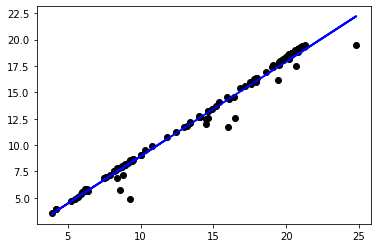

In [26]:
# Plot outputs
plt.scatter(df['PM10'], df['PM2.5'], color="black")
plt.plot(x_all , y_all, color="blue", linewidth=2)
plt.show()


In [28]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# The coefficients
print("Coefficients: \n", LR.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(df['PM2.5'], y_all))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(df['PM2.5'], y_all))

Coefficients: 
 [0.89727223]
Mean squared error: 0.38
Coefficient of determination: 0.99


Multiple Linear Regression

Multiple regression with humidity and pm2.5

In [49]:
x = train[['humidity', 'PM10']].values
y = train['PM2.5'].values

In [55]:
x1 = x[:, 0]
x2 = x[:, 1]
z = y


x_pred = np.linspace(0, 90, 30)   # range of porosity values
y_pred = np.linspace(0, 30, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T



ols = LinearRegression()
model = ols.fit(x, y)
predicted = model.predict(model_viz)
r2 = model.score(x,y)



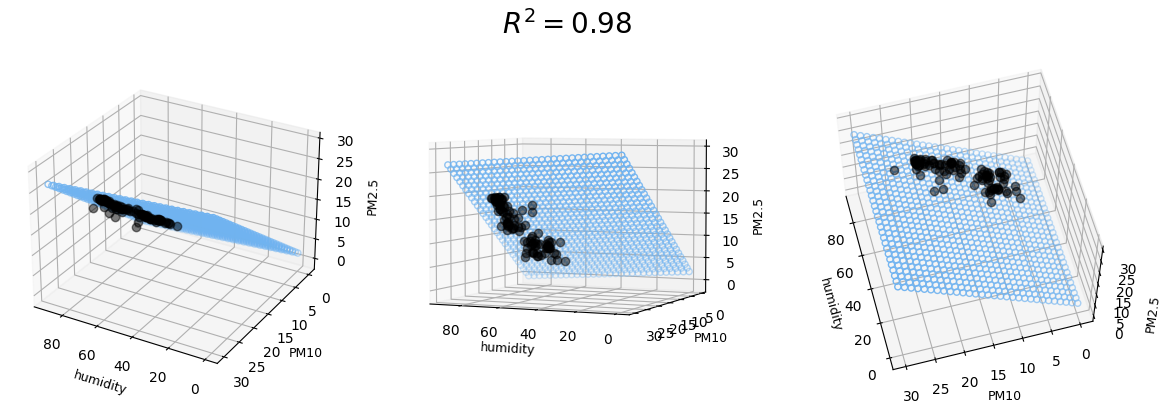

In [56]:
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x1, x2, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('humidity', fontsize=9)
    ax.set_ylabel('PM10', fontsize=9)
    ax.set_zlabel('PM2.5', fontsize=9)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

In [259]:
# The coefficients
print("Coefficients: \n", model.coef_)
print("Coefficient of determination: %.2f" % r2)

Coefficients: 
 [ 0.00000000e+00 -3.39328135e+03  1.95990322e+02 -5.00071659e+00
  4.75787025e-02]
Coefficient of determination: 0.98


polynominal regression with temperature

In [260]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [261]:
x = df.iloc[:, 3].values
y = df.iloc[:, 1].values
x1 = x.reshape(-1,1)
x_train = x1[:-41]
x_test = x1[-42:]

# Split the targets into training/testing sets
y_train = y[:-41]
y_test = y[-42:]

In [262]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
x_poly = poly_features.fit_transform(x_train)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_train)
print('Coefficients of x are', lin_reg.coef_)
print('Intercept is', lin_reg.intercept_)

Coefficients of x are [26.7452835  -0.49702678]
Intercept is -346.9334361465873


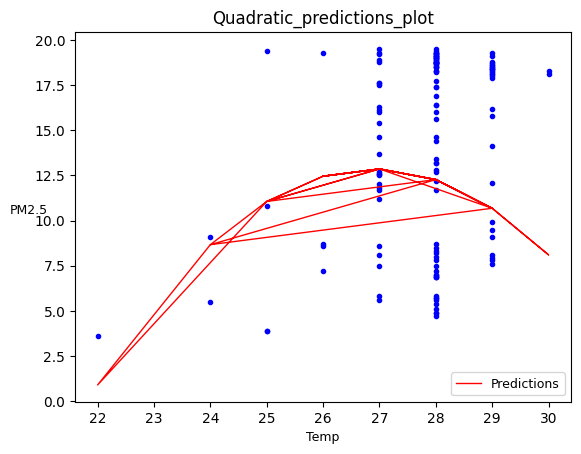

In [269]:
x_new = x.reshape(-1, 1)
x_new_poly = poly_features.transform(x_new)
y_new = lin_reg.predict(x_new_poly)
plt.plot(x, y, "b.")
plt.plot(x_new, y_new, "r-", linewidth = 1, label ="Predictions")
plt.xlabel("Temp", fontsize = 9)
plt.ylabel("PM2.5", rotation = 0, fontsize = 9)
plt.legend(loc ="lower right", fontsize = 9)
  
plt.title("Quadratic_predictions_plot")
plt.show()

In [271]:
# The coefficients
print("Coefficients: \n",lin_reg.coef_)
print("Intercept: \n", lin_reg.intercept_)
print("Coefficient of determination: %.2f" % r2_score(y ,y_new))

Coefficients: 
 [26.7452835  -0.49702678]
Intercept: 
 -346.9334361465873
Coefficient of determination: -0.20
